In [1]:
from sys import path
path.append("..")

import monte_carlo_spin_model
from   monte_carlo_spin_model.spin_system         import OneDimensionalSpinChain
from   monte_carlo_spin_model.spin_model          import IsingModel
from   monte_carlo_spin_model.annealing_algrithm  import equilibrate, annealing

from numpy import tanh, cosh

import matplotlib as mpl
from   matplotlib import pyplot as plt

In [2]:
coulping_const = 1.0
nn             = 200

ising_model = IsingModel(interaction_strength=coulping_const)
spin_chain  = OneDimensionalSpinChain(ising_model, shape=nn, is_pbc=True)
print("spin_chain.get_system_energy() = %f"%(spin_chain.get_system_energy()))
for i in range(spin_chain.size):
    site = spin_chain.get_site(i)

spin_chain.get_system_energy() = -8.000000


In [3]:
site1          = spin_chain.get_site(1)
site1_config   = spin_chain.get_index_config(1)

site2         = spin_chain.get_site(2)
prev_config   = site2.get_config()

site3          = spin_chain.get_site(3)
site3_config   = spin_chain.get_index_config(3)

print("site1  config      = {: d}".format(site1_config))
print("site2  prev_config = {: d}".format(prev_config))
print("site3  config      = {: d}".format(site3_config))

site1  config      = -1
site2  prev_config =  1
site3  config      = -1


In [4]:
prev_config   = site2.get_config()
print("site2  prev_config    = {: d}".format(prev_config))

spin_chain.sweep_site(site2)
current_config = site2.get_config()
print("site2  current_config = {: d}".format(current_config))

site2  prev_config    =  1
site2  current_config =  1


In [5]:
spin_chain.sweep_system()
print("spin_chain.get_system_energy() = %f"%(spin_chain.get_system_energy()))
for i in range(spin_chain.size):
    site = spin_chain.get_site(i)
#     print("site id = {:d}, config = {: d}".format(id(site), site.get_config()))

spin_chain.get_system_energy() = -40.000000


In [6]:
equilibrate(spin_chain, temperature=10.0, max_cycle=2000, tol=1e-4)

#T= 10.00, sweep=  1001, energy=-19.95, cv=  1.83


(-19.952095808383234, 1.831833339309405)

In [7]:
temp_list, ene_list, cv_list = annealing(
    spin_chain, temp_init=5.0, temp_final=0.1, nsteps=20, max_cycle=2000, tol=1e-4
)

#T=  5.00, sweep=  1006, energy=-40.46, cv=  7.95
#T=  4.74, sweep=  1000, energy=-41.84, cv=  8.35
#T=  4.48, sweep=  1006, energy=-43.93, cv= 10.07
#T=  4.23, sweep=  1042, energy=-46.43, cv= 10.92
#T=  3.97, sweep=  1014, energy=-48.31, cv= 11.14
#T=  3.71, sweep=  1012, energy=-52.91, cv= 13.41
#T=  3.45, sweep=  1008, energy=-55.94, cv= 14.38
#T=  3.19, sweep=  1003, energy=-58.23, cv= 18.59
#T=  2.94, sweep=  1007, energy=-66.05, cv= 19.13
#T=  2.68, sweep=  1016, energy=-70.43, cv= 22.68
#T=  2.42, sweep=  1001, energy=-79.13, cv= 27.58
#T=  2.16, sweep=  1004, energy=-86.32, cv= 36.21
#T=  1.91, sweep=  1021, energy=-96.42, cv= 42.01
#T=  1.65, sweep=  1004, energy=-108.19, cv= 53.07
#T=  1.39, sweep=  1004, energy=-122.56, cv= 67.22
#T=  1.13, sweep=  1000, energy=-141.62, cv= 78.94
#T=  0.87, sweep=  1001, energy=-162.79, cv= 68.01
#T=  0.62, sweep=  1000, energy=-186.91, cv= 61.01
#T=  0.36, sweep=  1000, energy=-199.95, cv=  1.48
#T=  0.10, sweep=  1000, energy=-200.00, cv=

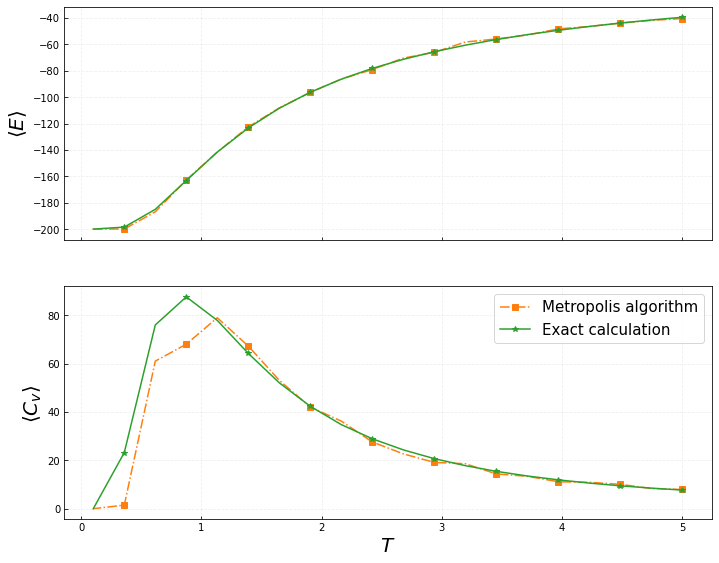

In [8]:
style_dict = {
    'Metropolis algorithm': dict(linestyle='-.', marker='s', color='C1',  markersize=6, markevery=2),
    'Exact calculation':    dict(linestyle='-',  marker='*', color='C2',  markersize=6, markevery=2),
}

params = {
        "axes.titlesize":  10, 
        "axes.labelsize":  20, 
        "legend.fontsize": 15,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10, 
        "xtick.direction":'in', 
        "ytick.direction":'in' 
}
mpl.rcParams.update(**params)

exact_ene_list = [-nn*tanh(coulping_const/t)                       for t in temp_list]
exact_cv_list  = [ nn*coulping_const/cosh(coulping_const/t)**2/t/t for t in temp_list]

fig1, ax1 = plt.subplots(2,1,figsize=(10,8),sharex=True)
fig1.subplots_adjust(left=0.09, bottom=0.1, right=0.99, top=0.99, wspace=0.1)
ax1[0].plot(temp_list, ene_list,       **style_dict['Metropolis algorithm'], label='Metropolis algorithm')
ax1[0].plot(temp_list, exact_ene_list, **style_dict['Exact calculation'],    label='Exact calculation')

ax1[1].plot(temp_list, cv_list,        **style_dict['Metropolis algorithm'], label='Metropolis algorithm')
ax1[1].plot(temp_list, exact_cv_list,  **style_dict['Exact calculation'],    label='Exact calculation')

props = {'ylabel':r'$\langle E \rangle$'}
ax1[0].grid(linestyle="--", alpha=0.2)
ax1[0].set(**props)

props = {'ylabel':r'$\langle C_v \rangle$', 'xlabel':r'$T$'}
ax1[1].legend(loc='upper right')
ax1[1].grid(linestyle="--", alpha=0.2)
ax1[1].set(**props);